In [7]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from time import time
import os

print(os.listdir("../Datacamp-SupervisedLearning"))

# Read the CSV file into a DataFrame: df
df = pd.read_csv('../Datacamp-SupervisedLearning/dataset/gapminder.csv')
print(df.head())

['.ipynb_checkpoints', 'Boston_House.ipynb', 'Ch1-Classifications.ipynb', 'Ch1-EDA-Iris_dataset.ipynb', 'Ch2-Regression-life_expectancy.ipynb', 'dataset', 'house-votes-84-names.csv']
   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


#### Explore the DataFrame using pandas methods

In [8]:
# show dataframe size
print('dataframe size is {} rows, {} columns'.format(df.shape[0], df.shape[1]))

dataframe size is 139 rows, 10 columns


In [9]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


Getting the feature and target variable arrays into the right format for scikit-learn is an important precursor to model building.

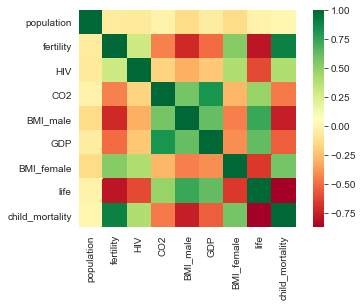

In [11]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn');

In [44]:
# Create arrays for features (fertility) and target variable (life)
y = df['life'].values
X_fertility = df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y = y.reshape(-1, 1)
X_fertility = X_fertility.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y.shape)
print("Dimensions of X after reshaping: ", X_fertility.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


#### Fit & predict for regression

0.6192442167740035


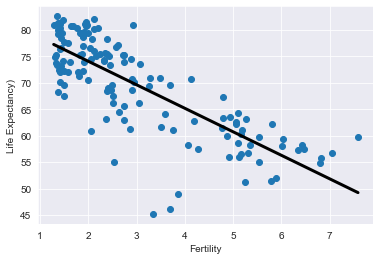

In [45]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression



# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
_ = plt.scatter(X_fertility, y)
_ = plt.ylabel('Life Expectancy)')
_ = plt.xlabel('Fertility')

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

The performance is quite decent for this basic regression model with only one feature!

#### Train/test split for regression

In [12]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


y = df[['life']]
X = df.drop(['life', 'Region'], axis =1)


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430132
Root Mean Squared Error: 3.2476010800369486


Excellent! Using all features has improved the model score. This makes sense, as the model has more information to learn from

### 5-fold cross-validation

Since we are performing 5-fold cross-validation, the function will return 5 scores.

By default, scikit-learn's cross_val_score() function uses R2  as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores.

In [13]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793446


Now that you have cross-validated your model, you can more confidently evaluate its predictions

### K-Fold CV comparison

In [14]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
start = time() # Get start time
cvscores_3 = cross_val_score(reg, X, y, cv=3)

end = time() # Get end time
print(np.mean(cvscores_3))     
print('time for cv=3 : {:.1f}ms' .format((end - start) * 1000))



# Perform 10-fold CV
start = time() # Get start time
cvscores_10 = cross_val_score(reg, X, y, cv=10)
end = time() # Get end time
print(np.mean(cvscores_10))
print('time for cv=10 : {:.1f}ms '.format((end - start) * 1000) )

0.8718712782622262
time for cv=3 : 43.0ms
0.8436128620131267
time for cv=10 : 82.0ms 


10-fold cross-validation takes almost double time to run compared to 3-fold cross-validation.    
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes



In [15]:
%timeit cross_val_score(reg, X, y, cv = 3)


24.2 ms ± 830 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit cross_val_score(reg, X, y, cv = 10)

95.3 ms ± 8.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
y = df['life']
y.shape


(139,)

In [105]:
X = df.drop(['life', 'Region'], axis =1)
X.shape

(139, 8)

### Regularization I: Lasso

In [109]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha =0.4, normalize=True)

# Fit the regressor to the data
y = df[['life']]
X = df.drop(['life', 'Region'], axis =1)

lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)



[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


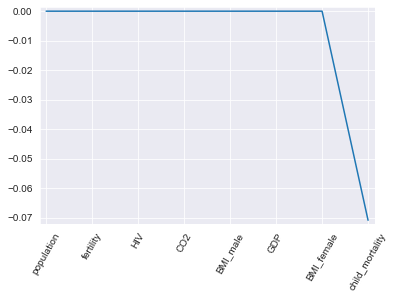

In [140]:
df_columns= df.drop(['life', 'Region'], axis =1).columns
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

### Regularization II: Ridge

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm.

In [18]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

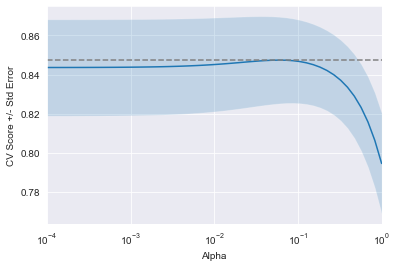

In [19]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10 )
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

The plot shows the R2 score as well as standard error for each alpha.    
See how the cross-validation scores change with different alphas, and to understand the importance of selecting the right value for alpha.      
Which alpha should you pick? How can you fine-tune your model?